In [36]:
import pandas as pd
import os

root = r"C:\Users\bali\Documents\jupyternote\cnn"

csvPath = os.path.join(root + "/alexnet.csv")
trainImages = os.path.join(root + "/train/.*jpg")
testImages = os.path.join(root + "/test/.*jpg")

df = pd.read_csv(csvPath)

print(df.head(10))
print(df.shape)

l = set()

for tag in df['tags'].values:
    labels = tag.split(' ')
    l.update(labels)
    
print(l)

                                 image_name       tags
0  NLA_398920523EDR_F0030078NCAM00302M1.jpg       sand
1  NLA_399365176EDR_F0030100NCAM00305M1.jpg       soil
2  NLA_399365204EDR_F0030100NCAM00305M1.jpg       soil
3  NLA_401761424EDR_F0042644NCAM00429M1.jpg       soil
4  NLA_401848341EDR_F0042778NCAM00409M1.jpg       soil
5  NLA_401848369EDR_F0042778NCAM00409M1.jpg       soil
6  NLA_401855285EDR_F0042778NCAM00434M1.jpg  soil rock
7  NLA_401936713EDR_F0042956NCAM00435M1.jpg       soil
8  NLA_401936747EDR_F0042956NCAM00435M1.jpg       soil
9  NLA_402034422EDR_F0042956NCAM00107M1.jpg       soil
(41, 2)
{'rock', 'soil', 'sand'}


In [37]:
import re

labels = df['tags']

def valueSearch(pattern):
    count = []
    num = 0
    for label in labels:
        x = re.search(pattern, label)
        if x:
            count.append(label)
    for c in count:
        num += 1
    return num

def showLabels(pattern):
    for label in labels:
        x = re.search(pattern, label)
        if x:
            print(label)
            
showLabels(r"^[\S]+$") # values with one label
showLabels(r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$") # values with six labels
showLabels(r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$") # values with nine labels

sand
soil
soil
soil
soil
soil
soil
soil
soil
soil
sand
sand
sand
sand
sand
soil
rock
rock
rock
rock
soil
rock


C:\Users\bali\AppData\Local\Temp\ipykernel_25332\2240712516.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(chartLabels, rotation=90)


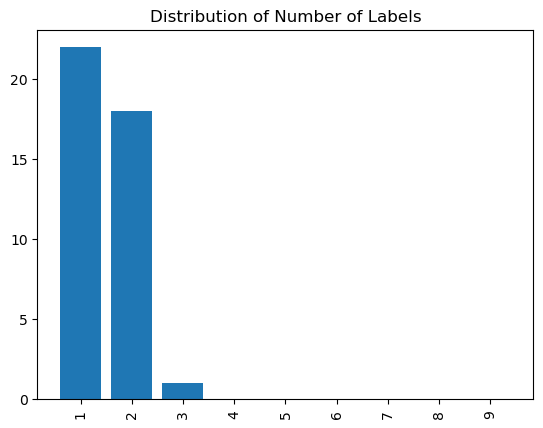

In [38]:
import matplotlib.pyplot as plt

patternList = [r"^[\S]+$", r"^[^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$",
              r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", ]
    
valueList = []
chartLabels = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

for p in patternList:
    valueList.append(valueSearch(p))

fig, ax = plt.subplots()
ax.bar(chartLabels, valueList)
ax.set_xticklabels(chartLabels, rotation=90)
plt.title("Distribution of Number of Labels")
plt.show()

In [39]:
import numpy as np
import cv2
# Iterate through the image id names and create unique file paths, 
# then cv2 imread and resize the images; and convert to np array. 
# Divide by 255 to normalize to 0-1. 

def loadImages(imgsize):
    imgs = []
    x = []
    imgsize=1024
    imgCount = 0

    for imageids in df['image_name'].values:
      print(imageids)
      if imgCount < 43:

            # images = os.path.join(trainImages + "/" + imageids + ".jpg")
          images = os.path.join(root+'/train/'+ imageids)
          imgs.append(images)
          imgCount += 1

    for path in imgs:
        img = cv2.imread(path)
        try:
          img = cv2.resize(img, (imgsize, imgsize))
        except:
          break  
        x.append(img)

    x = np.array(x, dtype=np.float32) / 255

    return x

X = loadImages(1024)


NLA_398920523EDR_F0030078NCAM00302M1.jpg
NLA_399365176EDR_F0030100NCAM00305M1.jpg
NLA_399365204EDR_F0030100NCAM00305M1.jpg
NLA_401761424EDR_F0042644NCAM00429M1.jpg
NLA_401848341EDR_F0042778NCAM00409M1.jpg
NLA_401848369EDR_F0042778NCAM00409M1.jpg
NLA_401855285EDR_F0042778NCAM00434M1.jpg
NLA_401936713EDR_F0042956NCAM00435M1.jpg
NLA_401936747EDR_F0042956NCAM00435M1.jpg
NLA_402034422EDR_F0042956NCAM00107M1.jpg
NLA_402109354EDR_F0043076NCAM00437M1.jpg
NLA_402646906EDR_F0050000NCAM00320M1.jpg
NLA_402654215EDR_F0050000NCAM00318M1.jpg
NLA_402737150EDR_F0050104NCAM00447M1.jpg
NLA_402815670EDR_F0050104NCAM00452M1.jpg
NLA_402815705EDR_F0050104NCAM00452M1.jpg
NLA_402816231EDR_F0050104NCAM00450M1.jpg
NLA_403353108EDR_F0050104NCAM00324M1.jpg
NLA_403354156EDR_F0050104NCAM00324M1.jpg
NLA_403619961EDR_F0050104NCAM00324M1.jpg
NLA_403976448EDR_F0050104NCAM00107M1.jpg
NLA_403977159EDR_F0050104NCAM00107M1.jpg
NLA_403977615EDR_F0050104NCAM00107M1.jpg
NLA_404064541EDR_F0050104NCAM00336M1.jpg
NLA_404065134EDR

In [40]:
from sklearn.model_selection import train_test_split

# Iterates through the tags and splits them. If the passed category arg is in the split tags; feature will append 1 
# to indicate presence of label and 0 in case of absence. It will then return the list of binarized labels.  

def loadLabels(category):
    feature = []
    for tags in df['tags'].values:
        tags = tags.split(' ')
        if category in tags:
            feature.append(1)
        else:
            feature.append(0)
    return feature

# Iterates through l (set of all labels - all 17 unique values) and creates a new df feature with the values being equal
# to loadLabels column; then returns the new df. 

def createFeatures(l):
    for col in l:
        df[col] = loadLabels(col)
    return df

df = createFeatures(l)

# Drops unnecessary cols (image name and tags) and drops all rows after 20000. Then converts df values to numpy array and returns
# the dataframe. 

def extractLabels(df):
    df = df.drop(columns=['image_name', 'tags'])
    # df = df.drop(labels=range(20000, 40479), axis=0)
    df = df.to_numpy()
    return df

y = extractLabels(df)

# Train test split values; at 0.2% 16,000-4,000 training / validation.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
print(X.shape[0], y.shape[0])


41 41


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

alexnet = Sequential()
alexnet.add(Conv2D(input_shape=(1024, 1024, 3), filters=96, kernel_size=(11,11), strides=(4,4), padding="same", activation="relu"))
alexnet.add(BatchNormalization())
alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

alexnet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1, 1), padding="same", activation="relu"))
alexnet.add(BatchNormalization())
alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
alexnet.add(BatchNormalization())
alexnet.add(Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), padding="same", activation="relu"))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding="same", activation="relu"))
alexnet.add(BatchNormalization())
alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
    
alexnet.add(Flatten())
alexnet.add(Dense(4096, activation="relu"))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(4096, activation="relu"))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(3, activation="sigmoid"))

alexnet.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

model_checkpoint = ModelCheckpoint('alexnet.h5', monitor="accuracy",verbose=1, save_best_only=True)
alexnet.fit(X_train, y_train, batch_size=20, epochs=10, validation_data=(X_test, y_test), callbacks=[model_checkpoint])